In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [86]:
import tensorflow as tf

In [87]:
import yfinance as yf # yfinance is used to download the data from yahoo finance

In [88]:
btc_data  = yf.download('BTC-USD' , period='3600d')
df = btc_data[['Open', 'High', 'Low', 'Close' , 'Adj Close', 'Volume']]  # İlgili sütunların seçilmesi

df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [89]:
df.info()  # Veri setinin bilgileri

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3398 entries, 2014-09-17 to 2024-01-05
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3398 non-null   float64
 1   High       3398 non-null   float64
 2   Low        3398 non-null   float64
 3   Close      3398 non-null   float64
 4   Adj Close  3398 non-null   float64
 5   Volume     3398 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 185.8 KB


In [90]:
len(df)  # Veri setinin uzunluğu

3398

In [91]:
# Only want closing price for each day 
bitcoin_prices = pd.DataFrame(df["Close"]).rename(columns={"Close": "Price"}) # Sadece kapanış fiyatlarını alıyoruz ve sütun ismini değiştiriyoruz
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


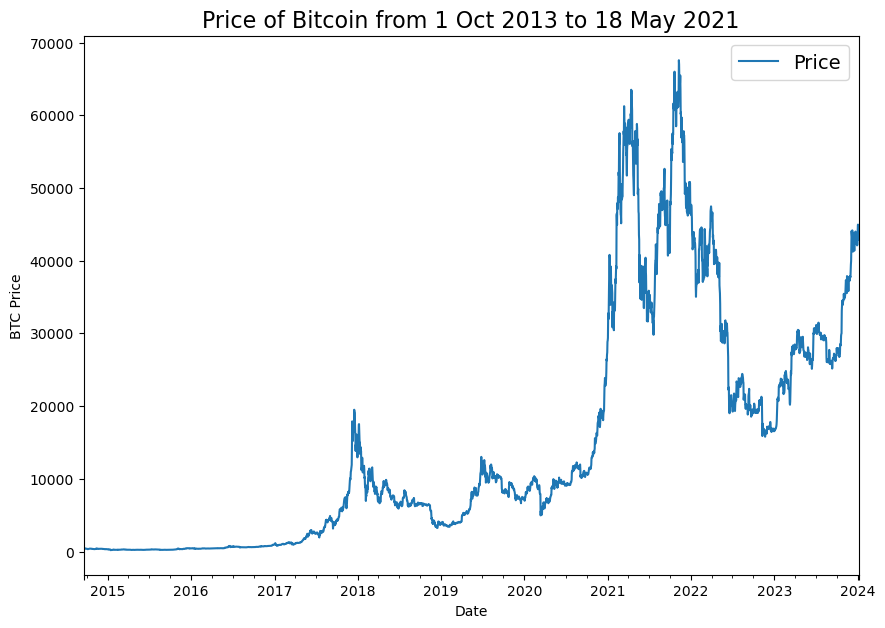

In [92]:
bitcoin_prices.plot(figsize=(10, 7))
plt.ylabel("BTC Price")
plt.title("Price of Bitcoin from 1 Oct 2013 to 18 May 2021", fontsize=16)
plt.legend(fontsize=14);

In [93]:
# Formatting historical Bitcoin data with Python
from datetime import datetime

timesteps = []
btc_price = []


# ilk 10 satırın gösterilmesi
for row in df.itertuples():
  timesteps.append(row.Index)
  btc_price.append(row.Close)





timesteps[:10], btc_price[:10]

([Timestamp('2014-09-17 00:00:00'),
  Timestamp('2014-09-18 00:00:00'),
  Timestamp('2014-09-19 00:00:00'),
  Timestamp('2014-09-20 00:00:00'),
  Timestamp('2014-09-21 00:00:00'),
  Timestamp('2014-09-22 00:00:00'),
  Timestamp('2014-09-23 00:00:00'),
  Timestamp('2014-09-24 00:00:00'),
  Timestamp('2014-09-25 00:00:00'),
  Timestamp('2014-09-26 00:00:00')],
 [457.3340148925781,
  424.44000244140625,
  394.7959899902344,
  408.90399169921875,
  398.8210144042969,
  402.1520080566406,
  435.7909851074219,
  423.2049865722656,
  411.5740051269531,
  404.42498779296875])

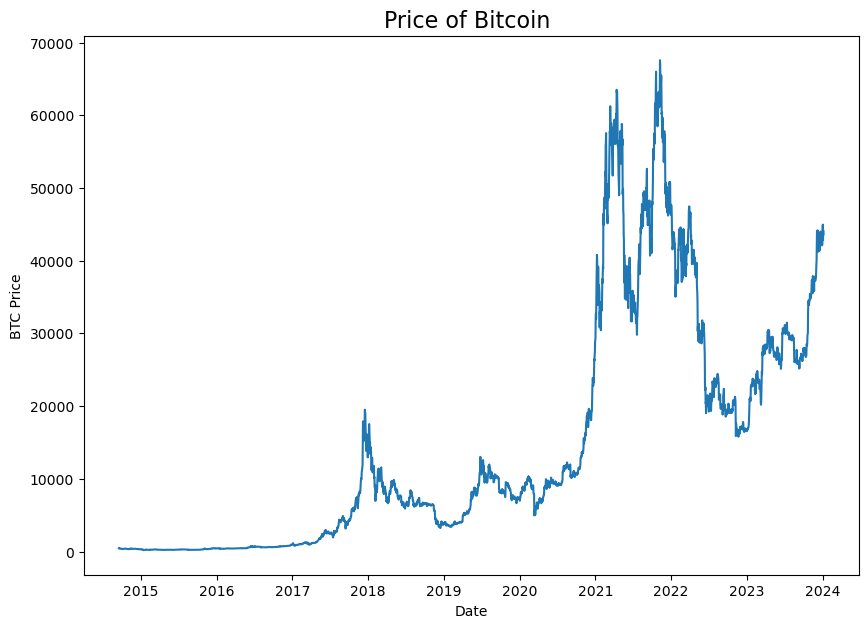

In [94]:
plt.figure(figsize=(10, 7))
plt.plot(timesteps, btc_price)
plt.title("Price of Bitcoin ", fontsize=16)
plt.xlabel("Date")
plt.ylabel("BTC Price");

In [95]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2014-09-17T00:00:00.000000000', '2014-09-18T00:00:00.000000000',
        '2014-09-19T00:00:00.000000000', '2014-09-20T00:00:00.000000000',
        '2014-09-21T00:00:00.000000000', '2014-09-22T00:00:00.000000000',
        '2014-09-23T00:00:00.000000000', '2014-09-24T00:00:00.000000000',
        '2014-09-25T00:00:00.000000000', '2014-09-26T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([457.33401489, 424.44000244, 394.79598999, 408.9039917 ,
        398.8210144 , 402.15200806, 435.79098511, 423.20498657,
        411.57400513, 404.42498779]))

In [96]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2718, 680, 2718, 680)

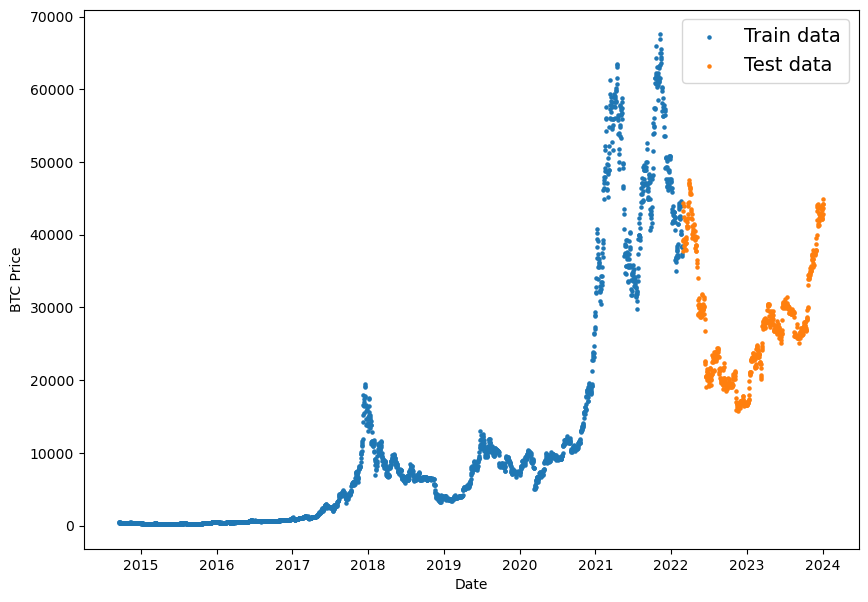

In [97]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

In [98]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format='.', start=0, end=None, label=None):
  """
  Plots a timesteps (a series of points in time) against values (a series of values across timesteps).
  
  Parameters
  ---------
  timesteps : array of timesteps
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (setting a value will index from end of timesteps & values)
  label : label to show on plot of values
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("BTC Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

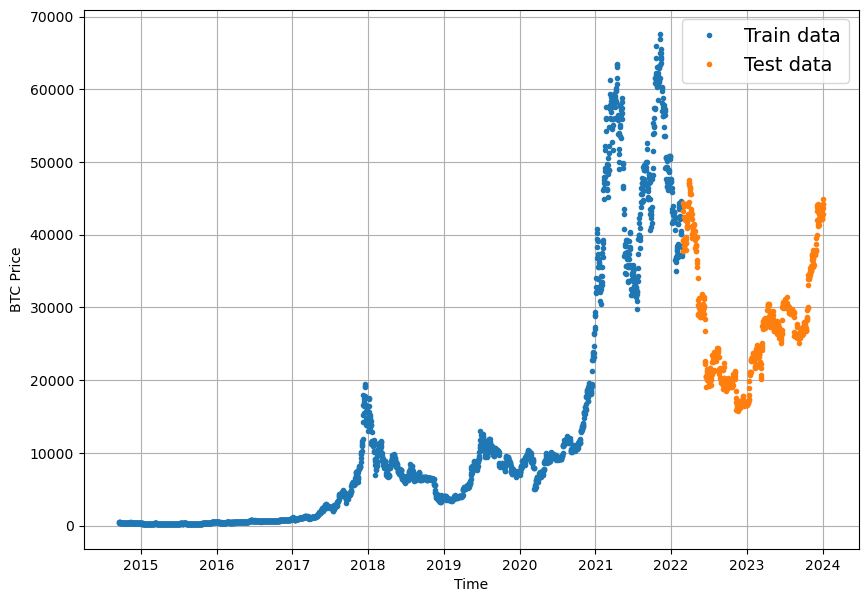

In [99]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

In [100]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy()
          }

In [101]:
# Find average price of Bitcoin in test dataset
tf.reduce_mean(y_test).numpy()

27630.81338752298

In [102]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [103]:
# Create function to label windowed data
def get_labelled_windows(x, horizon=1):
  """
  Creates labels for windowed dataset.

  E.g. if horizon=1 (default)
  Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  """
  return x[:, :-horizon], x[:, -horizon:]

In [104]:
# Test out the window labelling function
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [105]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [106]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(3391, 3391)

In [107]:
#örnek 3 satırın düzenli şekilde gösterilmesi
for i in range(3):
  print(f"Window: {full_windows[i]} \n -> Label: {full_labels[i]}")


Window: [457.33401489 424.44000244 394.79598999 408.9039917  398.8210144
 402.15200806 435.79098511] 
 -> Label: [423.20498657]
Window: [424.44000244 394.79598999 408.9039917  398.8210144  402.15200806
 435.79098511 423.20498657] 
 -> Label: [411.57400513]
Window: [394.79598999 408.9039917  398.8210144  402.15200806 435.79098511
 423.20498657 411.57400513] 
 -> Label: [404.42498779]


In [108]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]}  \n -> Label: {full_labels[i-3]}")

Window: [43442.85546875 42627.85546875 42099.40234375 42156.90234375
 42265.1875     44167.33203125 44957.96875   ]  
 -> Label: [42848.17578125]
Window: [42627.85546875 42099.40234375 42156.90234375 42265.1875
 44167.33203125 44957.96875    42848.17578125]  
 -> Label: [44179.921875]
Window: [42099.40234375 42156.90234375 42265.1875     44167.33203125
 44957.96875    42848.17578125 44179.921875  ]  
 -> Label: [43622.828125]


Turning windows into training and test sets

In [109]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [110]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
     

(2712, 679, 2712, 679)

In [111]:
train_windows[:5], train_labels[:5]

(array([[457.33401489, 424.44000244, 394.79598999, 408.9039917 ,
         398.8210144 , 402.15200806, 435.79098511],
        [424.44000244, 394.79598999, 408.9039917 , 398.8210144 ,
         402.15200806, 435.79098511, 423.20498657],
        [394.79598999, 408.9039917 , 398.8210144 , 402.15200806,
         435.79098511, 423.20498657, 411.57400513],
        [408.9039917 , 398.8210144 , 402.15200806, 435.79098511,
         423.20498657, 411.57400513, 404.42498779],
        [398.8210144 , 402.15200806, 435.79098511, 423.20498657,
         411.57400513, 404.42498779, 399.51998901]]),
 array([[423.20498657],
        [411.57400513],
        [404.42498779],
        [399.51998901],
        [377.18099976]]))

In [112]:
# Check to see if same (accounting for horizon and window size)
np.array_equal(np.squeeze(train_labels[:-HORIZON-1]), y_train[WINDOW_SIZE:])


False

In [113]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename 
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file
 

## model 1

In [114]:
import tensorflow as tf
from tensorflow.keras import layers

# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation                        
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
            y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100


 1/22 [>.............................] - ETA: 9s - loss: 5729.6328 - mae: 5729.6328INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 1s 49ms/step - loss: 2765.6343 - mae: 2765.6343 - val_loss: 2328.6064 - val_mae: 2328.6064
Epoch 2/100
 1/22 [>.............................] - ETA: 0s - loss: 899.5129 - mae: 899.5129INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 15ms/step - loss: 738.4800 - mae: 738.4800 - val_loss: 1397.1626 - val_mae: 1397.1625
Epoch 3/100
 1/22 [>.............................] - ETA: 0s - loss: 550.8679 - mae: 550.8679INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 625.3497 - mae: 625.3497 - val_loss: 863.2963 - val_mae: 863.2963
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 549.4179 - mae: 549.4179 - val_loss: 930.9763 - val_mae: 930.9763
Epoch 5/100
 1/22 [>.............................] - ETA: 0s - loss: 633.9382 - mae: 633.9382INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 534.8580 - mae: 534.8580 - val_loss: 836.7048 - val_mae: 836.7048
Epoch 6/100
 1/22 [>.............................] - ETA: 0s - loss: 374.3907 - mae: 374.3907INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 516.7496 - mae: 516.7496 - val_loss: 781.9995 - val_mae: 781.9995
Epoch 7/100
 1/22 [>.............................] - ETA: 0s - loss: 527.2354 - mae: 527.2354INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 505.0097 - mae: 505.0097 - val_loss: 764.5481 - val_mae: 764.5481
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 499.5767 - mae: 499.5767 - val_loss: 767.4805 - val_mae: 767.4805
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 488.8895 - mae: 488.8895 - val_loss: 801.1770 - val_mae: 801.1770
Epoch 10/100
 1/22 [>.............................] - ETA: 0s - loss: 317.9003 - mae: 317.9003INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 15ms/step - loss: 472.0021 - mae: 472.0021 - val_loss: 714.2097 - val_mae: 714.2097
Epoch 11/100
22/22 [==============================] - 0s 3ms/step - loss: 460.9741 - mae: 460.9741 - val_loss: 825.1599 - val_mae: 825.1599
Epoch 12/100
22/22 [==============================] - 0s 2ms/step - loss: 447.6698 - mae: 447.6698 - val_loss: 778.8648 - val_mae: 778.8648
Epoch 13/100
22/22 [==============================] - 0s 2ms/step - loss: 448.5100 - mae: 448.5100 - val_loss: 784.3405 - val_mae: 784.3405
Epoch 14/100
22/22 [==============================] - 0s 2ms/step - loss: 426.2273 - mae: 426.2273 - val_loss: 823.6766 - val_mae: 823.6766
Epoch 15/100
 1/22 [>.............................] - ETA: 0s - loss: 411.7946 - mae: 411.7946INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 15ms/step - loss: 427.2362 - mae: 427.2362 - val_loss: 637.0198 - val_mae: 637.0198
Epoch 16/100
22/22 [==============================] - 0s 2ms/step - loss: 407.1909 - mae: 407.1909 - val_loss: 654.1276 - val_mae: 654.1276
Epoch 17/100
 1/22 [>.............................] - ETA: 0s - loss: 425.5924 - mae: 425.5924INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 15ms/step - loss: 394.6556 - mae: 394.6556 - val_loss: 627.5445 - val_mae: 627.5445
Epoch 18/100
 1/22 [>.............................] - ETA: 0s - loss: 500.9584 - mae: 500.9584INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 15ms/step - loss: 426.5130 - mae: 426.5130 - val_loss: 621.1702 - val_mae: 621.1702
Epoch 19/100
22/22 [==============================] - 0s 2ms/step - loss: 415.6714 - mae: 415.6714 - val_loss: 682.1197 - val_mae: 682.1197
Epoch 20/100
22/22 [==============================] - 0s 2ms/step - loss: 398.9538 - mae: 398.9538 - val_loss: 729.8436 - val_mae: 729.8436
Epoch 21/100
 1/22 [>.............................] - ETA: 0s - loss: 451.3234 - mae: 451.3234INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 387.9408 - mae: 387.9408 - val_loss: 594.0427 - val_mae: 594.0427
Epoch 22/100
22/22 [==============================] - 0s 2ms/step - loss: 381.9826 - mae: 381.9826 - val_loss: 660.9367 - val_mae: 660.9367
Epoch 23/100
22/22 [==============================] - 0s 2ms/step - loss: 377.7074 - mae: 377.7074 - val_loss: 604.2357 - val_mae: 604.2357
Epoch 24/100
22/22 [==============================] - 0s 2ms/step - loss: 381.7527 - mae: 381.7527 - val_loss: 620.8463 - val_mae: 620.8463
Epoch 25/100
22/22 [==============================] - 0s 2ms/step - loss: 394.4917 - mae: 394.4917 - val_loss: 748.2095 - val_mae: 748.2095
Epoch 26/100
22/22 [==============================] - 0s 2ms/step - loss: 396.1087 - mae: 396.1087 - val_loss: 739.8955 - val_mae: 739.8955
Epoch 27/100
 1/22 [>.............................] - ETA: 0s - loss: 356.8909 - mae: 356.8909INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 379.0651 - mae: 379.0651 - val_loss: 578.4672 - val_mae: 578.4672
Epoch 28/100
22/22 [==============================] - 0s 2ms/step - loss: 367.9783 - mae: 367.9783 - val_loss: 655.5856 - val_mae: 655.5856
Epoch 29/100
22/22 [==============================] - 0s 2ms/step - loss: 373.6942 - mae: 373.6942 - val_loss: 614.5738 - val_mae: 614.5738
Epoch 30/100
22/22 [==============================] - 0s 2ms/step - loss: 375.6135 - mae: 375.6135 - val_loss: 579.7532 - val_mae: 579.7532
Epoch 31/100
22/22 [==============================] - 0s 3ms/step - loss: 363.9651 - mae: 363.9651 - val_loss: 643.6986 - val_mae: 643.6986
Epoch 32/100
22/22 [==============================] - 0s 2ms/step - loss: 373.6318 - mae: 373.6318 - val_loss: 761.6849 - val_mae: 761.6849
Epoch 33/100
22/22 [==============================] - 0s 2ms/step - loss: 381.3742 - mae: 381.3742 - val_loss: 632.0076 - val_mae: 632.0076
Epoch 34/100
 1/22 [>...........

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 360.1505 - mae: 360.1505 - val_loss: 565.7667 - val_mae: 565.7667
Epoch 35/100
 1/22 [>.............................] - ETA: 0s - loss: 323.4224 - mae: 323.4224INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 15ms/step - loss: 377.0864 - mae: 377.0864 - val_loss: 560.6193 - val_mae: 560.6193
Epoch 36/100
22/22 [==============================] - 0s 2ms/step - loss: 362.5282 - mae: 362.5282 - val_loss: 579.7283 - val_mae: 579.7283
Epoch 37/100
22/22 [==============================] - 0s 2ms/step - loss: 360.2998 - mae: 360.2998 - val_loss: 584.8008 - val_mae: 584.8008
Epoch 38/100
 1/22 [>.............................] - ETA: 0s - loss: 366.5587 - mae: 366.5587INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 363.9500 - mae: 363.9500 - val_loss: 554.9378 - val_mae: 554.9378
Epoch 39/100
22/22 [==============================] - 0s 2ms/step - loss: 353.5360 - mae: 353.5360 - val_loss: 581.1116 - val_mae: 581.1116
Epoch 40/100
22/22 [==============================] - 0s 2ms/step - loss: 359.3559 - mae: 359.3559 - val_loss: 599.0018 - val_mae: 599.0018
Epoch 41/100
22/22 [==============================] - 0s 2ms/step - loss: 354.3048 - mae: 354.3048 - val_loss: 639.1981 - val_mae: 639.1981
Epoch 42/100
22/22 [==============================] - 0s 2ms/step - loss: 362.1646 - mae: 362.1646 - val_loss: 592.0468 - val_mae: 592.0468
Epoch 43/100
22/22 [==============================] - 0s 2ms/step - loss: 362.9891 - mae: 362.9891 - val_loss: 616.2177 - val_mae: 616.2177
Epoch 44/100
22/22 [==============================] - 0s 2ms/step - loss: 367.4266 - mae: 367.4266 - val_loss: 659.0645 - val_mae: 659.0645
Epoch 45/100
22/22 [============

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 17ms/step - loss: 350.7144 - mae: 350.7144 - val_loss: 546.1904 - val_mae: 546.1904
Epoch 48/100
22/22 [==============================] - 0s 3ms/step - loss: 356.4617 - mae: 356.4617 - val_loss: 586.2981 - val_mae: 586.2981
Epoch 49/100
22/22 [==============================] - 0s 3ms/step - loss: 361.2065 - mae: 361.2065 - val_loss: 760.6352 - val_mae: 760.6352
Epoch 50/100
22/22 [==============================] - 0s 2ms/step - loss: 358.6898 - mae: 358.6898 - val_loss: 602.4854 - val_mae: 602.4854
Epoch 51/100
22/22 [==============================] - 0s 2ms/step - loss: 386.3872 - mae: 386.3872 - val_loss: 737.6633 - val_mae: 737.6633
Epoch 52/100
22/22 [==============================] - 0s 2ms/step - loss: 394.3096 - mae: 394.3096 - val_loss: 561.1151 - val_mae: 561.1151
Epoch 53/100
22/22 [==============================] - 0s 2ms/step - loss: 346.3297 - mae: 346.3297 - val_loss: 696.4465 - val_mae: 696.4465
Epoch 54/100
22/22 [============

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 358.6696 - mae: 358.6696 - val_loss: 537.3582 - val_mae: 537.3582
Epoch 56/100
22/22 [==============================] - 0s 2ms/step - loss: 356.7863 - mae: 356.7863 - val_loss: 567.1710 - val_mae: 567.1710
Epoch 57/100
22/22 [==============================] - 0s 2ms/step - loss: 343.8379 - mae: 343.8379 - val_loss: 652.0075 - val_mae: 652.0075
Epoch 58/100
22/22 [==============================] - 0s 2ms/step - loss: 355.0181 - mae: 355.0181 - val_loss: 579.2801 - val_mae: 579.2801
Epoch 59/100
22/22 [==============================] - 0s 2ms/step - loss: 357.3130 - mae: 357.3130 - val_loss: 871.4014 - val_mae: 871.4014
Epoch 60/100
22/22 [==============================] - 0s 2ms/step - loss: 385.7851 - mae: 385.7851 - val_loss: 541.7339 - val_mae: 541.7339
Epoch 61/100
22/22 [==============================] - 0s 2ms/step - loss: 379.9411 - mae: 379.9411 - val_loss: 707.2649 - val_mae: 707.2649
Epoch 62/100
22/22 [============

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 15ms/step - loss: 355.4778 - mae: 355.4778 - val_loss: 530.3557 - val_mae: 530.3557
Epoch 74/100
22/22 [==============================] - 0s 3ms/step - loss: 342.9180 - mae: 342.9180 - val_loss: 582.9377 - val_mae: 582.9377
Epoch 75/100
22/22 [==============================] - 0s 2ms/step - loss: 348.4993 - mae: 348.4993 - val_loss: 534.6167 - val_mae: 534.6167
Epoch 76/100
22/22 [==============================] - 0s 2ms/step - loss: 343.8927 - mae: 343.8927 - val_loss: 531.3016 - val_mae: 531.3016
Epoch 77/100
22/22 [==============================] - 0s 2ms/step - loss: 348.3954 - mae: 348.3954 - val_loss: 531.0593 - val_mae: 531.0593
Epoch 78/100
22/22 [==============================] - 0s 2ms/step - loss: 342.7343 - mae: 342.7343 - val_loss: 559.8677 - val_mae: 559.8677
Epoch 79/100
22/22 [==============================] - 0s 2ms/step - loss: 345.3440 - mae: 345.3440 - val_loss: 641.3155 - val_mae: 641.3155
Epoch 80/100
22/22 [============

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 378.9144 - mae: 378.9144 - val_loss: 528.0484 - val_mae: 528.0484
Epoch 82/100
22/22 [==============================] - 0s 2ms/step - loss: 337.7814 - mae: 337.7814 - val_loss: 538.5090 - val_mae: 538.5090
Epoch 83/100
22/22 [==============================] - 0s 2ms/step - loss: 336.6258 - mae: 336.6258 - val_loss: 576.3272 - val_mae: 576.3272
Epoch 84/100
22/22 [==============================] - 0s 2ms/step - loss: 345.9103 - mae: 345.9103 - val_loss: 544.9425 - val_mae: 544.9425
Epoch 85/100
22/22 [==============================] - 0s 2ms/step - loss: 349.6359 - mae: 349.6359 - val_loss: 569.4030 - val_mae: 569.4030
Epoch 86/100
22/22 [==============================] - 0s 2ms/step - loss: 363.9673 - mae: 363.9673 - val_loss: 571.8984 - val_mae: 571.8984
Epoch 87/100
22/22 [==============================] - 0s 2ms/step - loss: 373.3510 - mae: 373.3510 - val_loss: 532.4727 - val_mae: 532.4727
Epoch 88/100
22/22 [============

INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 337.4302 - mae: 337.4302 - val_loss: 525.3032 - val_mae: 525.3032
Epoch 91/100
22/22 [==============================] - 0s 2ms/step - loss: 344.9703 - mae: 344.9703 - val_loss: 536.8242 - val_mae: 536.8242
Epoch 92/100
22/22 [==============================] - 0s 2ms/step - loss: 338.5077 - mae: 338.5077 - val_loss: 529.8760 - val_mae: 529.8760
Epoch 93/100
22/22 [==============================] - 0s 3ms/step - loss: 335.1279 - mae: 335.1279 - val_loss: 537.9427 - val_mae: 537.9427
Epoch 94/100
22/22 [==============================] - 0s 2ms/step - loss: 336.2562 - mae: 336.2562 - val_loss: 528.3776 - val_mae: 528.3776
Epoch 95/100
 1/22 [>.............................] - ETA: 0s - loss: 236.2855 - mae: 236.2855INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_1_dense/assets


22/22 [==============================] - 0s 14ms/step - loss: 358.0243 - mae: 358.0243 - val_loss: 525.2449 - val_mae: 525.2449
Epoch 96/100
22/22 [==============================] - 0s 2ms/step - loss: 368.4044 - mae: 368.4044 - val_loss: 529.7906 - val_mae: 529.7906
Epoch 97/100
22/22 [==============================] - 0s 2ms/step - loss: 340.7067 - mae: 340.7067 - val_loss: 584.7037 - val_mae: 584.7037
Epoch 98/100
22/22 [==============================] - 0s 2ms/step - loss: 336.3040 - mae: 336.3040 - val_loss: 542.7250 - val_mae: 542.7250
Epoch 99/100
22/22 [==============================] - 0s 2ms/step - loss: 332.9017 - mae: 332.9017 - val_loss: 529.2381 - val_mae: 529.2381
Epoch 100/100
22/22 [==============================] - 0s 2ms/step - loss: 334.3083 - mae: 334.3083 - val_loss: 597.6043 - val_mae: 597.6043


In [115]:

# Evaluate model on test data
model_1.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 961us/step - loss: 597.6043 - mae: 597.6043


[597.6043090820312, 597.6043090820312]

In [116]:
# Load in saved best performing model_1 and evaluate on test data
model_1 = tf.keras.models.load_model("model_experiments/model_1_dense")
model_1.evaluate(test_windows, test_labels)
     

22/22 [==============================] - 0s 1ms/step - loss: 525.2449 - mae: 525.2449


[525.244873046875, 525.244873046875]

In [117]:

def make_preds(model, input_data):
  """
  Uses model to make predictions on input_data.

  Parameters
  ----------
  model: trained model 
  input_data: windowed input data (same kind of data model was trained on)

  Returns model predictions on input_data.
  """
  forecast = model.predict(input_data)
  return tf.squeeze(forecast) # return 1D array of predictions

In [118]:

# Make predictions using model_1 on the test dataset and view the results
model_1_preds = make_preds(model_1, test_windows)
len(model_1_preds), model_1_preds[:10]

22/22 [==============================] - 0s 1ms/step


(679,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([39035.15 , 39143.156, 37996.03 , 42250.363, 44291.65 , 44318.535,
        42857.156, 39550.074, 39178.51 , 38326.61 ], dtype=float32)>)

In [119]:

# Evaluate preds
model_1_results = evaluate_preds(y_true=tf.squeeze(test_labels), # reduce to right shape
                                 y_pred=model_1_preds)
model_1_results

{'mae': 525.2448, 'mse': 667474.2, 'rmse': 816.9909, 'mape': 1.8905137}

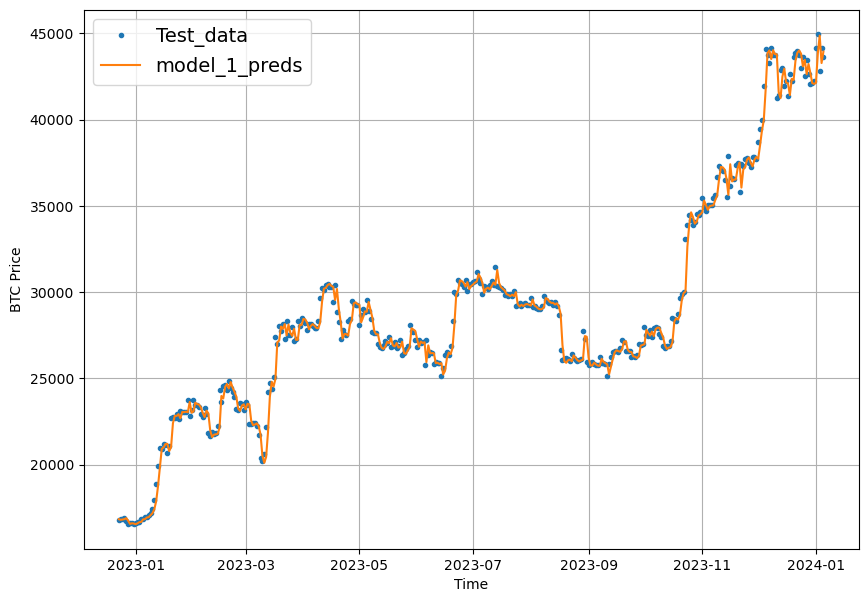

In [120]:
offset = 300
plt.figure(figsize=(10, 7))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, format="-", label="model_1_preds")
     

## Model 3 DENSE (win = 30 horizon = 7)

In [121]:
HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(3362, 3362)

In [122]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)
     


(2689, 673, 2689, 673)

In [123]:
tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_3.fit(train_windows,
            train_labels,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_3.name)])


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


INFO:tensorflow:Assets written to: model_experiments/model_3_dense/assets


In [124]:

# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 3153.8574


3153.857421875

In [125]:

# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 962us/step - loss: 1132.6289


1132.62890625

In [126]:


# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

22/22 [==============================] - 0s 880us/step


<tf.Tensor: shape=(5, 7), dtype=float32, numpy=
array([[37915.527, 38805.652, 37900.145, 38614.082, 38354.062, 39099.   ,
        37120.297],
       [38696.57 , 39096.836, 38666.902, 39180.54 , 38997.01 , 39439.336,
        37424.91 ],
       [37604.344, 38258.883, 38550.145, 38597.895, 38721.117, 38437.35 ,
        37459.39 ],
       [40768.14 , 40863.65 , 40908.12 , 41017.29 , 40737.668, 41890.613,
        39675.246],
       [42819.71 , 42817.33 , 42434.207, 42421.77 , 42524.656, 43762.996,
        42128.613]], dtype=float32)>

In [127]:
# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results

{'mae': array([3465.612  , 3035.24   , 3321.8325 , 2355.8906 , 2997.8147 ,
        3853.3633 , 4443.6274 , 2589.1082 , 1452.49   ,  772.4163 ,
        1548.8398 , 1606.673  , 1490.5011 , 1326.5452 , 1680.6367 ,
        1841.653  , 2583.6333 , 2588.9492 , 3376.7488 , 2327.9788 ,
        2097.1926 , 1811.707  , 1930.7405 , 1995.5184 , 2972.879  ,
        3175.3342 , 3558.7527 , 2790.2566 , 2021.2299 , 2272.5286 ,
         709.81305,  888.514  ,  762.7204 , 1617.9631 , 1130.0469 ,
        2098.4849 , 2119.496  , 2620.9626 , 3848.443  , 4417.593  ,
        2745.466  , 2949.073  , 2258.2183 , 2342.8794 , 2313.2825 ,
         647.9146 ,  834.21094,  731.11884,  715.06586,  642.4565 ,
         686.8962 ,  816.2589 ,  714.4213 ,  900.3376 , 1698.8203 ,
        1539.1334 ,  817.9565 ,  802.2048 ,  619.87054,  887.69696,
         446.572  ,  743.13116,  823.7411 , 1102.5302 , 1117.5072 ,
        1646.745  , 2589.2053 , 3204.5652 , 5048.0425 , 5019.0635 ,
        5373.3364 , 5290.1196 , 4447.636 

In [128]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)

  # Account for different sized metrics (for longer horizons, reduce to single number)
  if mae.ndim > 0: # if mae isn't already a scalar, reduce it to one by aggregating tensors to mean
    mae = tf.reduce_mean(mae)
    mse = tf.reduce_mean(mse)
    rmse = tf.reduce_mean(rmse)
    mape = tf.reduce_mean(mape)

  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),}

In [129]:
# Get model_3 results aggregated to single values
model_3_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_3_preds)
model_3_results


{'mae': 1132.629, 'mse': 2976744.8, 'rmse': 1310.1124, 'mape': 4.181059}

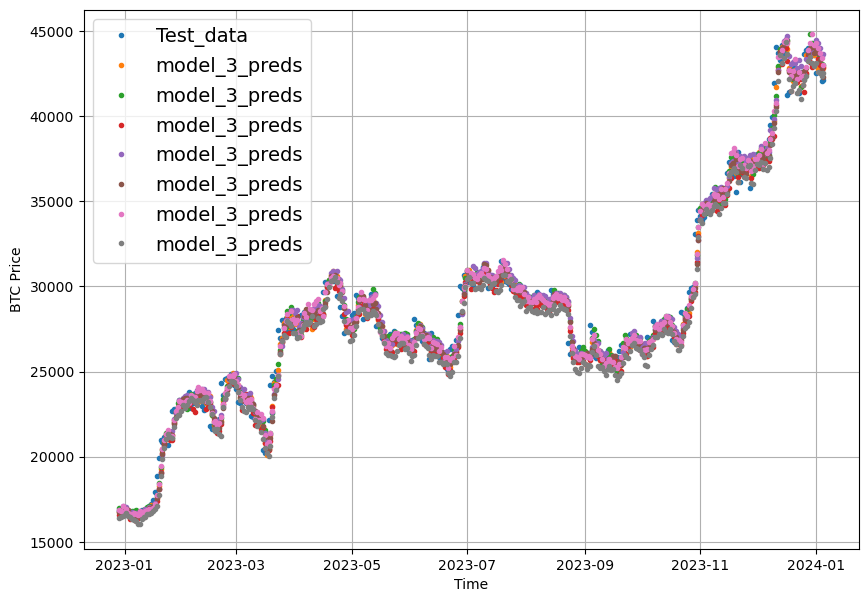

In [130]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:, 0], start=offset, label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_3_preds, start=offset, label="model_3_preds")
     


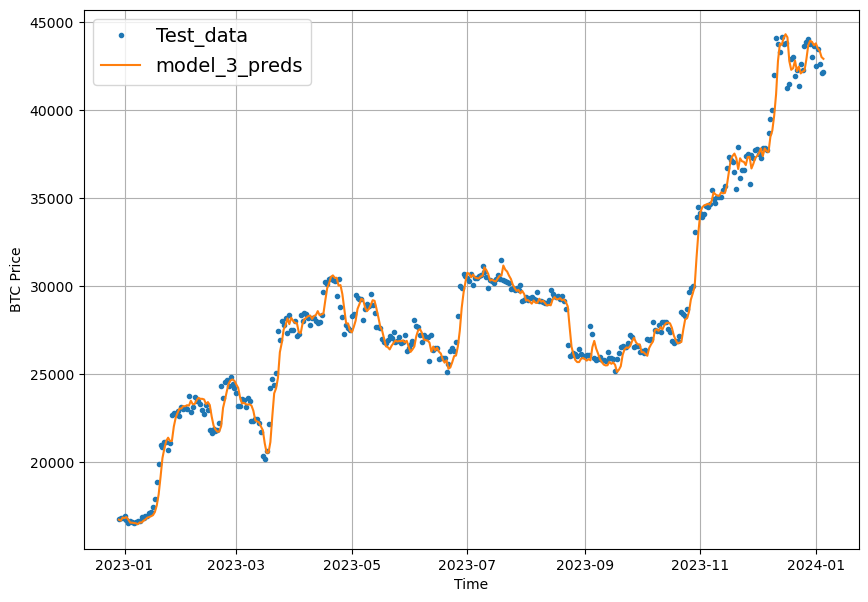

In [131]:
offset = 300
plt.figure(figsize=(10, 7))
# Plot model_3_preds by aggregating them (note: this condenses information so the preds will look fruther ahead than the test data)
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=offset, 
                 label="Test_data")
plot_time_series(timesteps=X_test[-len(test_windows):], 
                 values=tf.reduce_mean(model_3_preds, axis=1), 
                 format="-",
                 start=offset, 
                 label="model_3_preds")


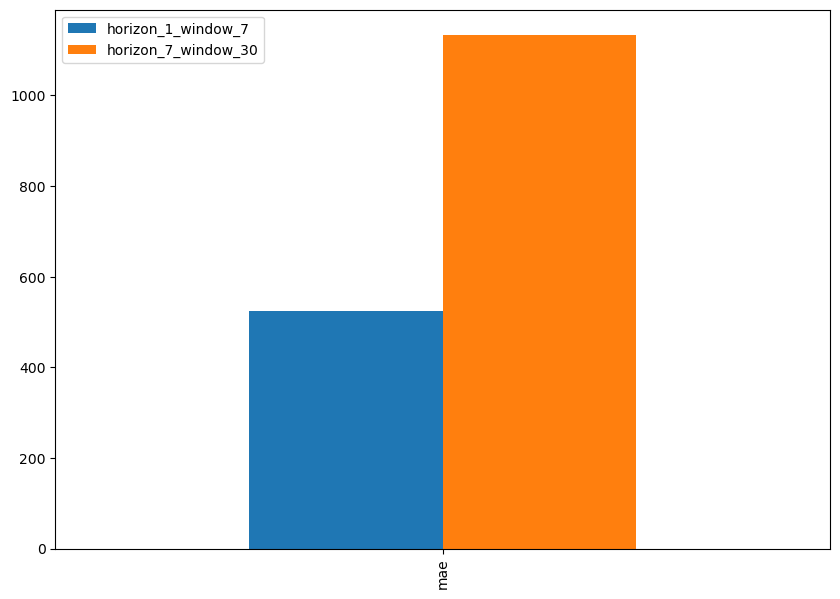

In [132]:
pd.DataFrame({
              "horizon_1_window_7": model_1_results["mae"], 
               
              "horizon_7_window_30": model_3_results["mae"]}, index=["mae"]).plot(figsize=(10, 7), kind="bar");


## Model 5  RNN (LSTM )

In [133]:
tf.random.set_seed(42)

# Let's build an LSTM model with the Functional API
inputs = layers.Input(shape=(WINDOW_SIZE))
x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))(inputs) # expand input dimension to be compatible with LSTM
# print(x.shape)
# x = layers.LSTM(128, activation="relu", return_sequences=True)(x) # this layer will error if the inputs are not the right shape
x = layers.LSTM(128, activation="relu")(x) # using the tanh loss function results in a massive error
# print(x.shape)
# Add another optional dense layer (you could add more of these to see if they improve model performance)
# x = layers.Dense(32, activation="relu")(x)
output = layers.Dense(HORIZON)(x)
model_5 = tf.keras.Model(inputs=inputs, outputs=output, name="model_5_lstm")

# Compile model
model_5.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Seems when saving the model several warnings are appearing: https://github.com/tensorflow/tensorflow/issues/47554 
model_5.fit(train_windows,
            train_labels,
            epochs=100,
            verbose=0,
            batch_size=128,
            validation_data=(test_windows, test_labels),
            callbacks=[create_model_checkpoint(model_name=model_5.name)])
     


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


INFO:tensorflow:Assets written to: model_experiments/model_5_lstm/assets


In [134]:

# Load in best version of model 5 and evaluate on the test data
model_5 = tf.keras.models.load_model("model_experiments/model_5_lstm/")
model_5.evaluate(test_windows, test_labels)

22/22 [==============================] - 0s 2ms/step - loss: 1173.3706


1173.37060546875

In [135]:

# Make predictions with our LSTM model
model_5_preds = make_preds(model_5, test_windows)
model_5_preds[:10]

22/22 [==============================] - 0s 1ms/step


<tf.Tensor: shape=(10, 7), dtype=float32, numpy=
array([[38497.027, 38176.363, 38394.31 , 38221.305, 38041.4  , 38394.05 ,
        37904.184],
       [38356.71 , 38323.56 , 38521.074, 38130.234, 38082.93 , 38454.996,
        38139.79 ],
       [38050.996, 37884.22 , 38236.586, 37981.074, 37648.523, 38163.656,
        37809.367],
       [39512.465, 39843.7  , 40556.19 , 40058.562, 39192.582, 40246.48 ,
        39935.277],
       [40975.004, 41281.992, 42107.14 , 41349.73 , 40543.062, 41718.855,
        41515.938],
       [41906.69 , 42120.63 , 43201.84 , 42328.78 , 41337.277, 43183.254,
        42539.492],
       [42267.832, 42594.316, 43200.625, 43309.832, 41443.957, 43412.695,
        43196.703],
       [41649.902, 41495.637, 42074.984, 42315.445, 41136.926, 42151.875,
        42168.586],
       [41156.984, 40738.688, 41388.676, 41273.22 , 40583.5  , 41612.625,
        41190.125],
       [40444.965, 39902.555, 40137.117, 40368.26 , 39653.13 , 40968.93 ,
        40239.023]], dtype=floa

In [136]:
# Evaluate model 5 preds
model_5_results = evaluate_preds(y_true=tf.squeeze(test_labels),
                                 y_pred=model_5_preds)
model_5_results


{'mae': 1173.3707, 'mse': 3233809.0, 'rmse': 1332.8015, 'mape': 4.3315363}

# Multivariate time series 

In [137]:

# Let's make a multivariate time series
bitcoin_prices.head()

,Price
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014


In [138]:
# Block reward values
block_reward_1 = 50 # 3 January 2009 (2009-01-03) - this block reward isn't in our dataset (it starts from 01 October 2013)
block_reward_2 = 25 # 28 November 2012 
block_reward_3 = 12.5 # 9 July 2016
block_reward_4 = 6.25 # 11 May 2020

# Block reward dates (datetime form of the above date stamps)
block_reward_2_datetime = np.datetime64("2012-11-28")
block_reward_3_datetime = np.datetime64("2016-07-09")
block_reward_4_datetime = np.datetime64("2020-05-11")



# Get date indexes for when to add in different block dates
block_reward_2_days = (block_reward_3_datetime - bitcoin_prices.index[0]).days
block_reward_3_days = (block_reward_4_datetime - bitcoin_prices.index[0]).days
#block_reward_2_days, block_reward_3_days


# Add block_reward column
bitcoin_prices_block = bitcoin_prices.copy()
bitcoin_prices_block["block_reward"] = None

# Set values of block_reward column (it's the last column hence -1 indexing on iloc)
bitcoin_prices_block.iloc[:block_reward_2_days, -1] = block_reward_2
bitcoin_prices_block.iloc[block_reward_2_days:block_reward_3_days, -1] = block_reward_3
bitcoin_prices_block.iloc[block_reward_3_days:, -1] = block_reward_4
bitcoin_prices_block.head()

,Price,block_reward
Date,,
2014-09-17,457.334015,25
2014-09-18,424.440002,25
2014-09-19,394.795990,25
2014-09-20,408.903992,25
2014-09-21,398.821014,25


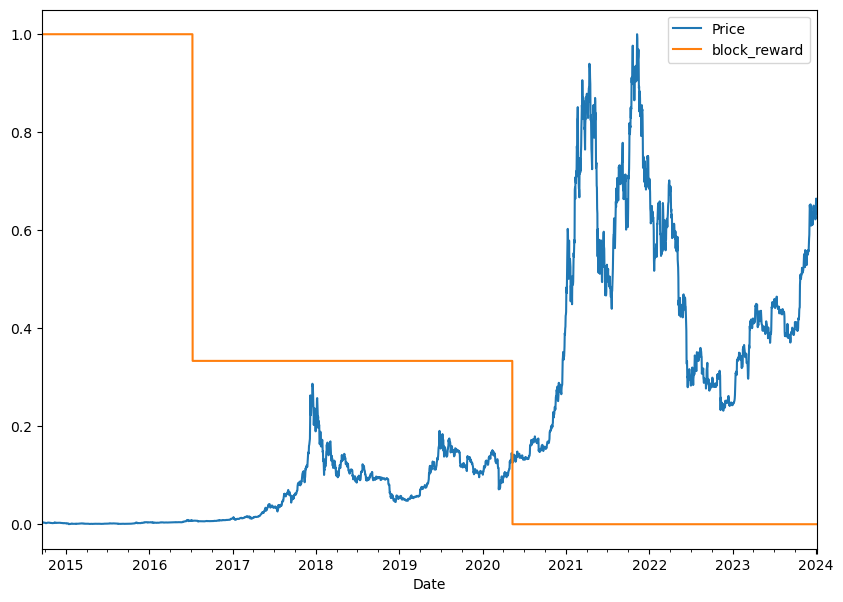

In [139]:

# Plot the block reward/price over time
# Note: Because of the different scales of our values we'll scale them to be between 0 and 1.
from sklearn.preprocessing import minmax_scale
scaled_price_block_df = pd.DataFrame(minmax_scale(bitcoin_prices_block[["Price", "block_reward"]]), # we need to scale the data first
                                     columns=bitcoin_prices_block.columns,
                                     index=bitcoin_prices_block.index)
scaled_price_block_df.plot(figsize=(10, 7));

In [140]:

# Setup dataset hyperparameters
HORIZON = 1
WINDOW_SIZE = 7

In [141]:
# Make a copy of the Bitcoin historical data with block reward feature
bitcoin_prices_windowed = bitcoin_prices_block.copy()

# Add windowed columns
for i in range(WINDOW_SIZE): # Shift values for each step in WINDOW_SIZE
  bitcoin_prices_windowed[f"Price+{i+1}"] = bitcoin_prices_windowed["Price"].shift(periods=i+1)
bitcoin_prices_windowed.head(10)

,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN
2014-09-22,402.152008,25,398.821014,408.903992,394.795990,424.440002,457.334015,NaN,NaN
2014-09-23,435.790985,25,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015,NaN
2014-09-24,423.204987,25,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,411.574005,25,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002


In [142]:


# Let's create X & y, remove the NaN's and convert to float32 to prevent TensorFlow errors 
X = bitcoin_prices_windowed.dropna().drop("Price", axis=1).astype(np.float32) 
y = bitcoin_prices_windowed.dropna()["Price"].astype(np.float32)
X.head()

,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,
2014-09-24,25.0,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002,457.334015
2014-09-25,25.0,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990,424.440002
2014-09-26,25.0,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992,394.795990
2014-09-27,25.0,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014,408.903992
2014-09-28,25.0,399.519989,404.424988,411.574005,423.204987,435.790985,402.152008,398.821014


In [143]:
# View labels
y.head()


Date
2014-09-24    423.204987
2014-09-25    411.574005
2014-09-26    404.424988
2014-09-27    399.519989
2014-09-28    377.181000
Name: Price, dtype: float32

In [144]:

# Make train and test sets
split_size = int(len(X) * 0.8)
X_train, y_train = X[:split_size], y[:split_size]
X_test, y_test = X[split_size:], y[split_size:]
len(X_train), len(y_train), len(X_test), len(y_test)

(2712, 2712, 679, 679)

## model 6 Multivariate time series (DENSE)

In [145]:
tf.random.set_seed(42)

# Make multivariate time series model
model_6 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  # layers.Dense(128, activation="relu"), # adding an extra layer here should lead to beating the naive model
  layers.Dense(HORIZON)
], name="model_6_dense_multivariate")

# Compile
model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit
model_6.fit(X_train, y_train,
            epochs=100,
            batch_size=128,
            verbose=0, # only print 1 line per epoch
            validation_data=(X_test, y_test),
            callbacks=[create_model_checkpoint(model_name=model_6.name)])
  

INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


INFO:tensorflow:Assets written to: model_experiments/model_6_dense_multivariate/assets


In [146]:
# Make sure best model is loaded and evaluate
model_6 = tf.keras.models.load_model("model_experiments/model_6_dense_multivariate")
model_6.evaluate(X_test, y_test)

22/22 [==============================] - 0s 1ms/step - loss: 531.6983


531.6983032226562

In [147]:

# Make predictions on multivariate data
model_6_preds = tf.squeeze(model_6.predict(X_test))
model_6_preds[:10]


22/22 [==============================] - 0s 867us/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([39042.395, 39297.11 , 37845.645, 42172.086, 44694.242, 44180.14 ,
       42569.59 , 39900.473, 38978.69 , 38459.223], dtype=float32)>

In [148]:
# Evaluate preds
model_6_results = evaluate_preds(y_true=y_test,
                                 y_pred=model_6_preds)
model_6_results

{'mae': 531.6985, 'mse': 673195.75, 'rmse': 820.48505, 'mape': 1.9129117}

## Model 9: Train a model on the full historical data to make predictions into future

In [149]:
bitcoin_prices_windowed.head()


,Price,block_reward,Price+1,Price+2,Price+3,Price+4,Price+5,Price+6,Price+7
Date,,,,,,,,,
2014-09-17,457.334015,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-18,424.440002,25,457.334015,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-19,394.795990,25,424.440002,457.334015,NaN,NaN,NaN,NaN,NaN
2014-09-20,408.903992,25,394.795990,424.440002,457.334015,NaN,NaN,NaN,NaN
2014-09-21,398.821014,25,408.903992,394.795990,424.440002,457.334015,NaN,NaN,NaN


In [150]:
# Train model on entire data to make prediction for the next day 
X_all = bitcoin_prices_windowed.drop(["Price", "block_reward"], axis=1).dropna().to_numpy() # only want prices, our future model can be a univariate model
y_all = bitcoin_prices_windowed.dropna()["Price"].to_numpy()

In [151]:

# 1. Turn X and y into tensor Datasets
features_dataset_all = tf.data.Dataset.from_tensor_slices(X_all)
labels_dataset_all = tf.data.Dataset.from_tensor_slices(y_all)

# 2. Combine features & labels
dataset_all = tf.data.Dataset.zip((features_dataset_all, labels_dataset_all))

# 3. Batch and prefetch for optimal performance
BATCH_SIZE = 1024 # taken from Appendix D in N-BEATS paper
dataset_all = dataset_all.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

dataset_all

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [152]:
tf.random.set_seed(42)

# Create model (nice and simple, just to test)
model_9 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
])

# Compile
model_9.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam())

# Fit model on all of the data to make future forecasts
model_9.fit(dataset_all,
            epochs=100,
            verbose=0) # don't print out anything, we've seen this all before
     

In [153]:
# How many timesteps to predict into the future?
INTO_FUTURE = 14 # since our Bitcoin data is daily, this is for 14 days


In [154]:
# 1. Create function to make predictions into the future
def make_future_forecast(values, model, into_future, window_size=WINDOW_SIZE) -> list:
  """
  Makes future forecasts into_future steps after values ends.

  Returns future forecasts as list of floats.
  """
  # 2. Make an empty list for future forecasts/prepare data to forecast on
  future_forecast = []
  last_window = values[-WINDOW_SIZE:] # only want preds from the last window (this will get updated)

  # 3. Make INTO_FUTURE number of predictions, altering the data which gets predicted on each time 
  for _ in range(into_future):
    
    # Predict on last window then append it again, again, again (model starts to make forecasts on its own forecasts)
    future_pred = model.predict(tf.expand_dims(last_window, axis=0))
    print(f"Predicting on: \n {last_window} -> Prediction: {tf.squeeze(future_pred).numpy()}\n")
    
    # Append predictions to future_forecast
    future_forecast.append(tf.squeeze(future_pred).numpy())
    # print(future_forecast)

    # Update last window with new pred and get WINDOW_SIZE most recent preds (model was trained on WINDOW_SIZE windows)
    last_window = np.append(last_window, future_pred)[-WINDOW_SIZE:]
  
  return future_forecast

In [155]:

# Make forecasts into future of the price of Bitcoin
# Note: if you're reading this at a later date, you may already be in the future, so the forecasts 
# we're making may not actually be forecasts, if that's the case, readjust the training data.
future_forecast = make_future_forecast(values=y_all,
                                       model=model_9,
                                       into_future=INTO_FUTURE,
                                       window_size=WINDOW_SIZE)

1/1 [==============================] - 0s 55ms/step
Predicting on: 
 [42156.90234375 42265.1875     44167.33203125 44957.96875
 42848.17578125 44179.921875   43622.828125  ] -> Prediction: 42248.08984375

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [42265.1875     44167.33203125 44957.96875    42848.17578125
 44179.921875   43622.828125   42248.08984375] -> Prediction: 42648.62890625

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [44167.33203125 44957.96875    42848.17578125 44179.921875
 43622.828125   42248.08984375 42648.62890625] -> Prediction: 44505.28515625

1/1 [==============================] - 0s 19ms/step
Predicting on: 
 [44957.96875    42848.17578125 44179.921875   43622.828125
 42248.08984375 42648.62890625 44505.28515625] -> Prediction: 43827.59375

1/1 [==============================] - 0s 20ms/step
Predicting on: 
 [42848.17578125 44179.921875   43622.828125   42248.08984375
 42648.62890625 44505.28515625 43827.59375   ] -

In [156]:
future_forecast[:10]


[42248.09,
 42648.63,
 44505.285,
 43827.594,
 42912.863,
 43910.215,
 43278.465,
 42230.684,
 43138.797,
 44224.62]

In [157]:
def get_future_dates(start_date, into_future, offset=1):
  """
  Returns array of datetime values from ranging from start_date to start_date+horizon.

  start_date: date to start range (np.datetime64)
  into_future: number of days to add onto start date for range (int)
  offset: number of days to offset start_date by (default 1)
  """
  start_date = start_date + np.timedelta64(offset, "D") # specify start date, "D" stands for day
  end_date = start_date + np.timedelta64(into_future, "D") # specify end date
  return np.arange(start_date, end_date, dtype="datetime64[D]") # return a date range between start date and end date
     


In [158]:

# Last timestep of timesteps (currently in np.datetime64 format)
last_timestep = bitcoin_prices.index[-1]
last_timestep


Timestamp('2024-01-05 00:00:00')

In [159]:

# Get next two weeks of timesteps
next_time_steps = get_future_dates(start_date=last_timestep, 
                                   into_future=INTO_FUTURE)
next_time_steps

array(['2024-01-06', '2024-01-07', '2024-01-08', '2024-01-09',
       '2024-01-10', '2024-01-11', '2024-01-12', '2024-01-13',
       '2024-01-14', '2024-01-15', '2024-01-16', '2024-01-17',
       '2024-01-18', '2024-01-19'], dtype='datetime64[D]')

In [160]:

# Insert last timestep/final price so the graph doesn't look messed
next_time_steps = np.insert(next_time_steps, 0, last_timestep)
future_forecast = np.insert(future_forecast, 0, btc_price[-1])
next_time_steps, future_forecast

(array(['2024-01-05', '2024-01-06', '2024-01-07', '2024-01-08',
        '2024-01-09', '2024-01-10', '2024-01-11', '2024-01-12',
        '2024-01-13', '2024-01-14', '2024-01-15', '2024-01-16',
        '2024-01-17', '2024-01-18', '2024-01-19'], dtype='datetime64[D]'),
 array([43622.83 , 42248.09 , 42648.63 , 44505.285, 43827.594, 42912.863,
        43910.215, 43278.465, 42230.684, 43138.797, 44224.62 , 43160.113,
        42960.402, 43693.215, 42937.55 ], dtype=float32))

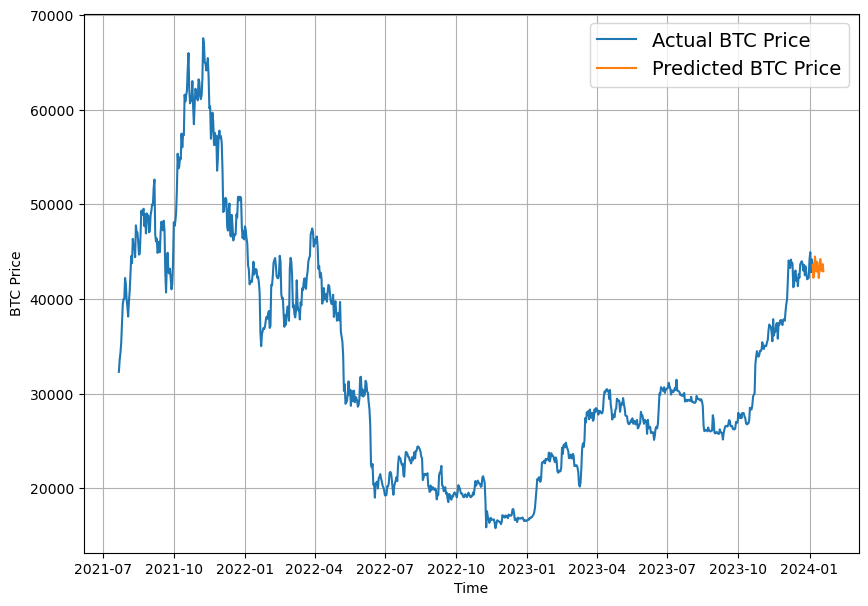

In [161]:
# Plot future price predictions of Bitcoin
plt.figure(figsize=(10, 7))
plot_time_series(bitcoin_prices.index, btc_price, start=2500, format="-", label="Actual BTC Price")
plot_time_series(next_time_steps, future_forecast, format="-", label="Predicted BTC Price")


In [162]:
#future forecastın tarihlerini ve fiyatları bana yaz
future_forecast = pd.DataFrame(future_forecast, columns=["Price"])
future_forecast["Date"] = next_time_steps
future_forecast.set_index("Date", inplace=True)
future_forecast


,Price
Date,
2024-01-05,43622.828125
2024-01-06,42248.089844
2024-01-07,42648.628906
2024-01-08,44505.285156
2024-01-09,43827.593750
2024-01-10,42912.863281
2024-01-11,43910.214844
2024-01-12,43278.464844
2024-01-13,42230.683594


In [163]:
# tuple oluştur  : date ve price
# tuple JSON a çevir

future_forecast.to_json("future_forecast.json", orient="records")
